In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import time
from pandas import Series, DataFrame
from numpy.random import randn
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2017, 8, 12, 18, 23, 28, 738000)

In [4]:
now.year, now.month, now.day

(2017, 8, 11)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(926, 56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta

In [12]:
start = datetime(2011, 1, 7)

In [13]:
start

datetime.datetime(2011, 1, 7, 0, 0)

In [14]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [15]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 字符串和datetime的相互转换

In [21]:
stamp = datetime(2011, 1, 1)

In [22]:
stamp

datetime.datetime(2011, 1, 1, 0, 0)

In [23]:
str(stamp)

'2011-01-01 00:00:00'

In [24]:
stamp.strftime('%Y-%m-%d')

'2011-01-01'

In [28]:
value = '2011-01-03'

In [29]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [34]:
datestrs1 = ['7/6/2011', '8/6/2011']

In [40]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [41]:
from dateutil.parser import parse

In [42]:
parse('1011-01-03')

datetime.datetime(1011, 1, 3, 0, 0)

In [49]:
parse('June 30 1997 10:45 PM')

datetime.datetime(1997, 6, 30, 22, 45)

In [52]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [54]:
datestrs

['7/6/2011', '8/6/2011']

In [55]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [56]:
idx = pd.to_datetime(datestrs + [None])

In [57]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [59]:
idx[0],idx[1],idx[2]

(Timestamp('2011-07-06 00:00:00'), Timestamp('2011-08-06 00:00:00'), NaT)

## 时间序列基础

In [61]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [62]:
ts = Series(randn(6), index=dates)

In [63]:
ts

2011-01-02   -0.395570
2011-01-05    0.076873
2011-01-07    0.655096
2011-01-08    0.484086
2011-01-10    1.185217
2011-01-12    0.808793
dtype: float64

In [64]:
type(ts)

pandas.core.series.Series

In [65]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [66]:
ts[::2]

2011-01-02   -0.395570
2011-01-07    0.655096
2011-01-10    1.185217
dtype: float64

In [67]:
ts + ts[::2]

2011-01-02   -0.791139
2011-01-05         NaN
2011-01-07    1.310192
2011-01-08         NaN
2011-01-10    2.370434
2011-01-12         NaN
dtype: float64

In [68]:
ts.index.dtype

dtype('<M8[ns]')

In [69]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

In [71]:
stamp = ts.index[2]

In [72]:
ts[stamp]

0.6550962083443288

In [73]:
ts

2011-01-02   -0.395570
2011-01-05    0.076873
2011-01-07    0.655096
2011-01-08    0.484086
2011-01-10    1.185217
2011-01-12    0.808793
dtype: float64

In [74]:
ts['2011-01-05']

0.076873302563768148

In [75]:
ts['20110107']

0.6550962083443288

In [78]:
ts['1/12/2011']

0.80879341247319403

In [84]:
longer_ts = Series(randn(1000), index=pd.date_range('01/10/2000', periods=1000))

In [85]:
longer_ts.head()

2000-01-10   -1.709777
2000-01-11   -1.325992
2000-01-12   -1.250933
2000-01-13    0.157971
2000-01-14    1.137262
Freq: D, dtype: float64

In [86]:
longer_ts['2001']

2001-01-01    1.076540
2001-01-02    1.281732
2001-01-03   -0.340691
2001-01-04   -0.302591
2001-01-05    2.312725
2001-01-06    0.797661
2001-01-07   -0.215533
2001-01-08    0.907752
2001-01-09   -0.652504
2001-01-10    1.079963
2001-01-11   -1.271726
2001-01-12    0.733193
2001-01-13    0.218320
2001-01-14   -0.378223
2001-01-15    0.285554
2001-01-16    0.500747
2001-01-17    0.579820
2001-01-18    2.637860
2001-01-19    0.666540
2001-01-20   -1.310758
2001-01-21   -0.455557
2001-01-22    0.881851
2001-01-23   -2.381837
2001-01-24   -0.858185
2001-01-25    0.867092
2001-01-26   -0.257962
2001-01-27    1.691319
2001-01-28    1.137581
2001-01-29    0.968029
2001-01-30    0.111945
                ...   
2001-12-02   -0.904726
2001-12-03   -0.941037
2001-12-04   -0.845235
2001-12-05   -1.368020
2001-12-06   -0.160054
2001-12-07   -1.728066
2001-12-08    0.322737
2001-12-09    0.104637
2001-12-10   -0.974694
2001-12-11   -0.483604
2001-12-12   -2.123935
2001-12-13   -1.204058
2001-12-14 

In [87]:
 longer_ts['2001-05']

2001-05-01    1.292020
2001-05-02    1.459729
2001-05-03    0.602534
2001-05-04   -0.094277
2001-05-05    0.786124
2001-05-06    1.952874
2001-05-07    0.149232
2001-05-08   -2.410034
2001-05-09   -1.016910
2001-05-10    0.337987
2001-05-11    1.585997
2001-05-12   -0.210165
2001-05-13    0.247068
2001-05-14   -0.971903
2001-05-15   -0.343910
2001-05-16   -0.674519
2001-05-17   -0.545404
2001-05-18   -0.032174
2001-05-19   -0.288688
2001-05-20   -0.267526
2001-05-21    1.002813
2001-05-22    0.488752
2001-05-23    0.184416
2001-05-24   -0.746104
2001-05-25    0.493770
2001-05-26    0.115853
2001-05-27   -0.134698
2001-05-28   -0.830236
2001-05-29   -1.011993
2001-05-30   -1.948858
2001-05-31    1.639082
Freq: D, dtype: float64

In [88]:
ts

2011-01-02   -0.395570
2011-01-05    0.076873
2011-01-07    0.655096
2011-01-08    0.484086
2011-01-10    1.185217
2011-01-12    0.808793
dtype: float64

In [89]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.655096
2011-01-08    0.484086
2011-01-10    1.185217
2011-01-12    0.808793
dtype: float64

In [90]:
# 切片
ts['1/6/2011':'1/11/2011']

2011-01-07    0.655096
2011-01-08    0.484086
2011-01-10    1.185217
dtype: float64

In [92]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.395570
2011-01-05    0.076873
2011-01-07    0.655096
2011-01-08    0.484086
dtype: float64

In [94]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

long_df = DataFrame(randn(100, 4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [98]:
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-2.336992,0.901467,-0.236456,0.351535
2001-05-09,0.285669,-0.903845,0.788536,1.870474
2001-05-16,0.376574,-2.023844,-0.606443,1.456046
2001-05-23,-0.303280,0.597287,2.346867,0.146915
2001-05-30,-1.231110,0.757323,-0.280117,-0.698021


## 带有重复索引的时间序列

In [100]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])

dup_ts = Series(randn(5), index=dates)

In [101]:
dup_ts

2000-01-01    0.745796
2000-01-02    2.097487
2000-01-02    0.501275
2000-01-02   -0.456470
2000-01-03   -0.635784
dtype: float64

In [102]:
dup_ts.index.is_unique

False

In [103]:
dup_ts['1/1/2000']

0.74579614778631997

In [105]:
dup_ts['1/2/2000']

2000-01-02    2.097487
2000-01-02    0.501275
2000-01-02   -0.456470
dtype: float64

In [106]:
grouped = dup_ts.groupby(level=0)

In [107]:
grouped.mean()

2000-01-01    0.745796
2000-01-02    0.714097
2000-01-03   -0.635784
dtype: float64

In [108]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 日期的范围、频率以及移动

In [109]:
ts

2011-01-02   -0.395570
2011-01-05    0.076873
2011-01-07    0.655096
2011-01-08    0.484086
2011-01-10    1.185217
2011-01-12    0.808793
dtype: float64

In [115]:
ts.resample('D')[:]

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called __getitem__(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


2011-01-02   -0.395570
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.076873
2011-01-06         NaN
2011-01-07    0.655096
2011-01-08    0.484086
2011-01-09         NaN
2011-01-10    1.185217
2011-01-11         NaN
2011-01-12    0.808793
Freq: D, dtype: float64

In [111]:
ts

2011-01-02   -0.395570
2011-01-05    0.076873
2011-01-07    0.655096
2011-01-08    0.484086
2011-01-10    1.185217
2011-01-12    0.808793
dtype: float64

### 生成日期范围

In [5]:
index = pd.date_range('4/1/2012', '6/1/2012')

In [6]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [8]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [9]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [10]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [11]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移量

In [14]:
from pandas.tseries.offsets import Hour, Minute

In [15]:
hour = Hour()

In [16]:
hour

<Hour>

In [17]:
four_hour = Hour(4)

In [18]:
four_hour

<4 * Hours>

In [19]:
pd.date_range('1/1/2000', '1/3/2000', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [20]:
Hour(2) + Minute(30)

<150 * Minutes>

In [21]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [24]:
pd.date_range('1/1/2000', periods=30, freq='B')

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-17', '2000-01-18',
               '2000-01-19', '2000-01-20', '2000-01-21', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-31', '2000-02-01', '2000-02-02', '2000-02-03',
               '2000-02-04', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11'],
              dtype='datetime64[ns]', freq='B')

In [25]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')

In [26]:
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [27]:
ts = Series(randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [28]:
ts

2000-01-31   -0.079615
2000-02-29   -0.124077
2000-03-31    2.322452
2000-04-30   -0.189401
Freq: M, dtype: float64

In [29]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.079615
2000-04-30   -0.124077
Freq: M, dtype: float64

In [30]:
ts.shift(-2)

2000-01-31    2.322452
2000-02-29   -0.189401
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [31]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29     0.558467
2000-03-31   -19.717851
2000-04-30    -1.081552
Freq: M, dtype: float64

In [32]:
ts.shift(2, freq='M')

2000-03-31   -0.079615
2000-04-30   -0.124077
2000-05-31    2.322452
2000-06-30   -0.189401
Freq: M, dtype: float64

In [33]:
ts.shift(3, freq='D')

2000-02-03   -0.079615
2000-03-03   -0.124077
2000-04-03    2.322452
2000-05-03   -0.189401
dtype: float64

In [34]:
ts.shift(1, freq='3D')

2000-02-03   -0.079615
2000-03-03   -0.124077
2000-04-03    2.322452
2000-05-03   -0.189401
dtype: float64

In [35]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.079615
2000-02-29 01:30:00   -0.124077
2000-03-31 01:30:00    2.322452
2000-04-30 01:30:00   -0.189401
Freq: M, dtype: float64

## 通过偏移量对日期进行位移

In [36]:
from pandas.tseries.offsets import Day, MonthEnd

In [38]:
now = datetime(2011, 11, 17)

In [39]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [41]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [43]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [44]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [45]:
offset = MonthEnd()

In [46]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [47]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [48]:
ts = Series(randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [52]:
ts

2000-01-15   -0.838144
2000-01-19    1.196411
2000-01-23    1.650068
2000-01-27   -0.849290
2000-01-31   -0.618547
2000-02-04    0.133753
2000-02-08   -0.243366
2000-02-12    0.449022
2000-02-16   -0.428092
2000-02-20    1.317962
2000-02-24   -1.370078
2000-02-28    0.149802
2000-03-03    2.075296
2000-03-07    0.634433
2000-03-11   -0.359260
2000-03-15    0.804635
2000-03-19    0.655579
2000-03-23    0.136695
2000-03-27    0.117842
2000-03-31   -1.643738
Freq: 4D, dtype: float64

In [53]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.108099
2000-02-29    0.001286
2000-03-31    0.302685
dtype: float64

In [54]:
ts.resample('M', how='mean')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01-31    0.108099
2000-02-29    0.001286
2000-03-31    0.302685
Freq: M, dtype: float64

## 时区处理

In [55]:
import pytz

In [57]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [58]:
tz = pytz.timezone('US/Eastern')

In [59]:
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [60]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [61]:
ts = Series(randn(len(rng)), index=rng)

In [62]:
ts

2012-03-09 09:30:00   -0.860570
2012-03-10 09:30:00    0.628913
2012-03-11 09:30:00   -1.317166
2012-03-12 09:30:00    0.743736
2012-03-13 09:30:00   -1.455466
2012-03-14 09:30:00   -1.003520
Freq: D, dtype: float64

In [65]:
ts.index.tz

In [67]:
pd.date_range('3/9/2012 9:30', periods=10, ferq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [68]:
ts_utc = ts.tz_localize('UTC')

In [69]:
ts_utc

2012-03-09 09:30:00+00:00   -0.860570
2012-03-10 09:30:00+00:00    0.628913
2012-03-11 09:30:00+00:00   -1.317166
2012-03-12 09:30:00+00:00    0.743736
2012-03-13 09:30:00+00:00   -1.455466
2012-03-14 09:30:00+00:00   -1.003520
Freq: D, dtype: float64

In [70]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [71]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -0.860570
2012-03-10 04:30:00-05:00    0.628913
2012-03-11 05:30:00-04:00   -1.317166
2012-03-12 05:30:00-04:00    0.743736
2012-03-13 05:30:00-04:00   -1.455466
2012-03-14 05:30:00-04:00   -1.003520
Freq: D, dtype: float64

In [73]:
ts_eastern = ts.tz_localize('US/Eastern')

In [74]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.860570
2012-03-10 14:30:00+00:00    0.628913
2012-03-11 13:30:00+00:00   -1.317166
2012-03-12 13:30:00+00:00    0.743736
2012-03-13 13:30:00+00:00   -1.455466
2012-03-14 13:30:00+00:00   -1.003520
Freq: D, dtype: float64

In [75]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.860570
2012-03-10 15:30:00+01:00    0.628913
2012-03-11 14:30:00+01:00   -1.317166
2012-03-12 14:30:00+01:00    0.743736
2012-03-13 14:30:00+01:00   -1.455466
2012-03-14 14:30:00+01:00   -1.003520
Freq: D, dtype: float64

In [76]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 操作时区意识型Timestamp对象

In [77]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [79]:
stamp_utc = stamp.tz_localize('utc')

In [80]:
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [81]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [82]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [83]:
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [84]:
stamp_utc.value

1299902400000000000L

In [85]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000L

In [86]:
from pandas.tseries.offsets import Hour

In [87]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [88]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [89]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [93]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [94]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [95]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## 不同时区之间的运算

In [96]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [97]:
ts = Series(randn(len(rng)), index=rng)

In [98]:
ts

2012-03-07 09:30:00    0.626379
2012-03-08 09:30:00   -1.059167
2012-03-09 09:30:00    0.550187
2012-03-12 09:30:00    1.176959
2012-03-13 09:30:00    0.241752
2012-03-14 09:30:00    0.909597
2012-03-15 09:30:00   -0.459857
2012-03-16 09:30:00    0.541327
2012-03-19 09:30:00   -0.203946
2012-03-20 09:30:00   -1.297460
Freq: B, dtype: float64

In [103]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [104]:
result = ts1 + ts2

In [105]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 时期及其算数运算

In [106]:
p = pd.Period(2007, freq='A-DEC')

In [107]:
p

Period('2007', 'A-DEC')

In [108]:
p + 5

Period('2012', 'A-DEC')

In [109]:
p - 2

Period('2005', 'A-DEC')

In [111]:
pd.Period('2014', freq='A-DEC') -p

7L

In [112]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')

In [113]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [114]:
Series(randn(6), index=rng)

2000-01   -0.860828
2000-02   -1.925224
2000-03    0.799958
2000-04    0.996154
2000-05   -0.698034
2000-06    0.792842
Freq: M, dtype: float64

In [115]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [116]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [117]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换

In [118]:
p = pd.Period('2007', freq='A-DEC')

In [120]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [121]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [122]:
p = pd.Period('2007', freq='A-JUN')

In [123]:
p

Period('2007', 'A-JUN')

In [124]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [125]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [126]:
p =pd.Period('2007-08', 'M')

In [127]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [128]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [129]:
ts = Series(randn(len(rng)), index=rng)

In [130]:
ts

2006    1.497019
2007   -0.495923
2008    1.224512
2009   -0.304419
Freq: A-DEC, dtype: float64

In [131]:
ts.asfreq('M', how='start')

2006-01    1.497019
2007-01   -0.495923
2008-01    1.224512
2009-01   -0.304419
Freq: M, dtype: float64

In [132]:
ts.asfreq('B', how='end')

2006-12-29    1.497019
2007-12-31   -0.495923
2008-12-31    1.224512
2009-12-31   -0.304419
Freq: B, dtype: float64

### 按季度计算的时期频率

In [5]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [6]:
p

Period('2012Q4', 'Q-JAN')

In [7]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [11]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [12]:
p.asfreq('M', 'start')

Period('2011-11', 'M')

In [13]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [14]:
p4pm

Period('2012-01-30 16:00', 'T')

In [16]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [17]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [18]:
ts = Series(np.arange(len(rng)), index=rng)

In [19]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [20]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [21]:
ts.index = new_rng.to_timestamp()

In [22]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 将timestamp转换为Period（及其反向过程）

In [23]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')

In [24]:
ts = Series(randn(3), index=rng)

In [25]:
ts

2000-01-31    0.443955
2000-02-29   -0.407663
2000-03-31    0.527831
Freq: M, dtype: float64

In [26]:
pts = ts.to_period()

In [27]:
pts

2000-01    0.443955
2000-02   -0.407663
2000-03    0.527831
Freq: M, dtype: float64

In [28]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [29]:
ts2 = Series(randn(6), index=rng)

In [31]:
ts2.to_period('M')

2000-01    0.873981
2000-01   -0.008169
2000-01   -0.538525
2000-02   -0.586978
2000-02    0.676746
2000-02   -0.197280
Freq: M, dtype: float64

In [32]:
pts = ts.to_period()

In [33]:
pts

2000-01    0.443955
2000-02   -0.407663
2000-03    0.527831
Freq: M, dtype: float64

In [34]:
pts.to_timestamp(how='end')

2000-01-31    0.443955
2000-02-29   -0.407663
2000-03-31    0.527831
Freq: M, dtype: float64

### 通过数组创建PeriodIndex

In [35]:
data = pd.read_csv('macrodata.csv')

In [37]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [38]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [42]:
# 将年度和季度列 整合在一起
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [43]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [44]:
data.index = index

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 203 entries, 1959Q1 to 2009Q3
Freq: Q-DEC
Data columns (total 14 columns):
year        203 non-null float64
quarter     203 non-null float64
realgdp     203 non-null float64
realcons    203 non-null float64
realinv     203 non-null float64
realgovt    203 non-null float64
realdpi     203 non-null float64
cpi         203 non-null float64
m1          203 non-null float64
tbilrate    203 non-null float64
unemp       203 non-null float64
pop         203 non-null float64
infl        203 non-null float64
realint     203 non-null float64
dtypes: float64(14)
memory usage: 23.8 KB


In [46]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## 重采样及频率转换（resampling）

In [47]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)

In [48]:
ts.resample('M', how='mean')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01-31    0.107362
2000-02-29   -0.005519
2000-03-31    0.200526
2000-04-30   -0.074254
Freq: M, dtype: float64

In [49]:
ts.resample('M', how='mean', kind='period')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01    0.107362
2000-02   -0.005519
2000-03    0.200526
2000-04   -0.074254
Freq: M, dtype: float64

### 降采样

In [50]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')

In [51]:
ts = Series(randn(len(rng)), index=rng)

In [52]:
ts

2000-01-01 00:00:00   -0.992472
2000-01-01 00:01:00   -0.546343
2000-01-01 00:02:00    1.387951
2000-01-01 00:03:00    1.542158
2000-01-01 00:04:00    1.172700
2000-01-01 00:05:00   -1.204057
2000-01-01 00:06:00    0.297461
2000-01-01 00:07:00   -1.111831
2000-01-01 00:08:00   -0.411726
2000-01-01 00:09:00   -0.521858
2000-01-01 00:10:00   -0.615547
2000-01-01 00:11:00   -1.309961
Freq: T, dtype: float64

In [54]:
ts.resample('5min', how='sum', label='right')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:05:00    2.563994
2000-01-01 00:10:00   -2.952010
2000-01-01 00:15:00   -1.925508
Freq: 5T, dtype: float64

In [56]:
ts.resample('5min', how='sum', closed='left')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:00:00    2.563994
2000-01-01 00:05:00   -2.952010
2000-01-01 00:10:00   -1.925508
Freq: 5T, dtype: float64

In [55]:
ts.resample('5min', how='sum', closed='left', label='left')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:00:00    2.563994
2000-01-01 00:05:00   -2.952010
2000-01-01 00:10:00   -1.925508
Freq: 5T, dtype: float64

In [57]:
# 对索引结果做一些位移
ts.resample('5min', how='sum', loffset='-1s')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


1999-12-31 23:59:59    2.563994
2000-01-01 00:04:59   -2.952010
2000-01-01 00:09:59   -1.925508
Freq: 5T, dtype: float64

### OHLC重采样

In [58]:
ts.resample('5min', how='ohlc')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


,open,high,low,close
2000-01-01 00:00:00,-0.992472,1.542158,-0.992472,1.172700
2000-01-01 00:05:00,-1.204057,0.297461,-1.204057,-0.521858
2000-01-01 00:10:00,-0.615547,-0.615547,-1.309961,-1.309961


In [59]:
ts

2000-01-01 00:00:00   -0.992472
2000-01-01 00:01:00   -0.546343
2000-01-01 00:02:00    1.387951
2000-01-01 00:03:00    1.542158
2000-01-01 00:04:00    1.172700
2000-01-01 00:05:00   -1.204057
2000-01-01 00:06:00    0.297461
2000-01-01 00:07:00   -1.111831
2000-01-01 00:08:00   -0.411726
2000-01-01 00:09:00   -0.521858
2000-01-01 00:10:00   -0.615547
2000-01-01 00:11:00   -1.309961
Freq: T, dtype: float64

In [60]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')

ts = Series(np.arange(100), index=rng)

In [62]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [63]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### 升采样和插值

In [67]:
frame = DataFrame(randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.285599,-0.402908,0.510867,-0.996577
2000-01-12,1.759464,0.272754,-2.424676,0.867622


In [78]:
df_daily = frame.resample('D')

In [83]:
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [84]:
frame.resample('D', fill_method='ffill')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,1.285599,-0.402908,0.510867,-0.996577
2000-01-06,1.285599,-0.402908,0.510867,-0.996577
2000-01-07,1.285599,-0.402908,0.510867,-0.996577
2000-01-08,1.285599,-0.402908,0.510867,-0.996577
2000-01-09,1.285599,-0.402908,0.510867,-0.996577
2000-01-10,1.285599,-0.402908,0.510867,-0.996577
2000-01-11,1.285599,-0.402908,0.510867,-0.996577
2000-01-12,1.759464,0.272754,-2.424676,0.867622


In [85]:
frame.resample('D', fill_method='ffill', limit=2)

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=2)
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,1.285599,-0.402908,0.510867,-0.996577
2000-01-06,1.285599,-0.402908,0.510867,-0.996577
2000-01-07,1.285599,-0.402908,0.510867,-0.996577
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.759464,0.272754,-2.424676,0.867622


In [86]:
frame.resample('W-THU', fill_method='ffill')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-06,1.285599,-0.402908,0.510867,-0.996577
2000-01-13,1.759464,0.272754,-2.424676,0.867622


### 通过时期进行重采样

In [87]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.066712,-0.163328,0.077714,-1.380406
2000-02,0.028798,-0.018389,0.649700,-0.873127
2000-03,-0.247918,0.801241,0.697676,-1.608591
2000-04,1.322870,0.087266,-1.616303,-0.839311
2000-05,0.911802,0.892372,0.150125,0.424238


In [88]:
annual_frame = frame.resample('A-DEC', how='mean')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [89]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.130894,0.202080,0.159390,-0.305954
2001,-0.124762,0.455441,-0.263381,-0.060018


In [91]:
# Q-DEC 季度型
annual_frame.resample('Q-DEC', fill_method='ffill')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000Q1,0.130894,0.202080,0.159390,-0.305954
2000Q2,0.130894,0.202080,0.159390,-0.305954
2000Q3,0.130894,0.202080,0.159390,-0.305954
2000Q4,0.130894,0.202080,0.159390,-0.305954
2001Q1,-0.124762,0.455441,-0.263381,-0.060018
2001Q2,-0.124762,0.455441,-0.263381,-0.060018
2001Q3,-0.124762,0.455441,-0.263381,-0.060018
2001Q4,-0.124762,0.455441,-0.263381,-0.060018


In [92]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q1,0.130894,0.202080,0.159390,-0.305954
2000Q2,0.130894,0.202080,0.159390,-0.305954
2000Q3,0.130894,0.202080,0.159390,-0.305954
2000Q4,0.130894,0.202080,0.159390,-0.305954
2001Q1,-0.124762,0.455441,-0.263381,-0.060018
2001Q2,-0.124762,0.455441,-0.263381,-0.060018
2001Q3,-0.124762,0.455441,-0.263381,-0.060018
2001Q4,-0.124762,0.455441,-0.263381,-0.060018


In [93]:
annual_frame.resample('Q-MAR', fill_method='ffill')

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q4,0.130894,0.202080,0.159390,-0.305954
2001Q1,0.130894,0.202080,0.159390,-0.305954
2001Q2,0.130894,0.202080,0.159390,-0.305954
2001Q3,0.130894,0.202080,0.159390,-0.305954
2001Q4,-0.124762,0.455441,-0.263381,-0.060018
2002Q1,-0.124762,0.455441,-0.263381,-0.060018
2002Q2,-0.124762,0.455441,-0.263381,-0.060018
2002Q3,-0.124762,0.455441,-0.263381,-0.060018


## 时间序列绘图

In [94]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [97]:
close_px_all.head(10)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [98]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


In [99]:
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


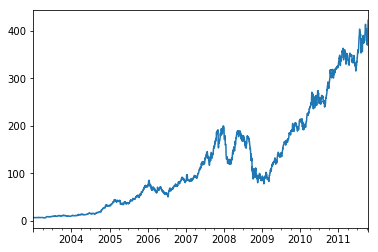

In [109]:
close_px['AAPL'].plot()

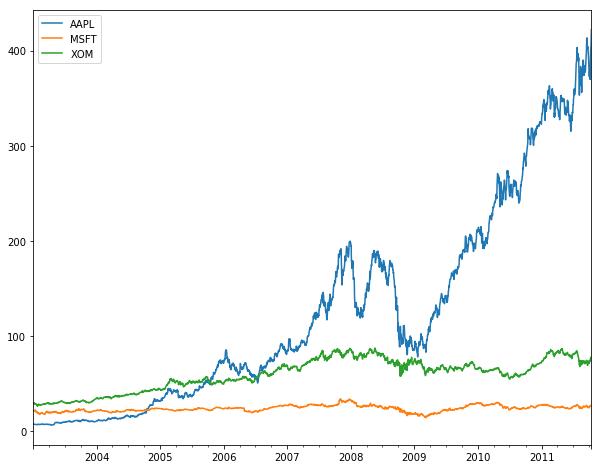

In [111]:
close_px.plot(figsize=(10, 8))

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


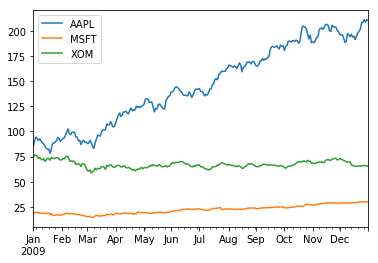

In [112]:
close_px.ix['2009'].plot()

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


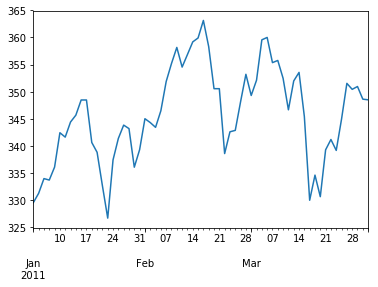

In [114]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.
D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


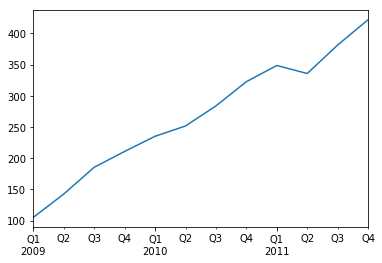

In [116]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.ix['2009':].plot()

## 移动窗口函数

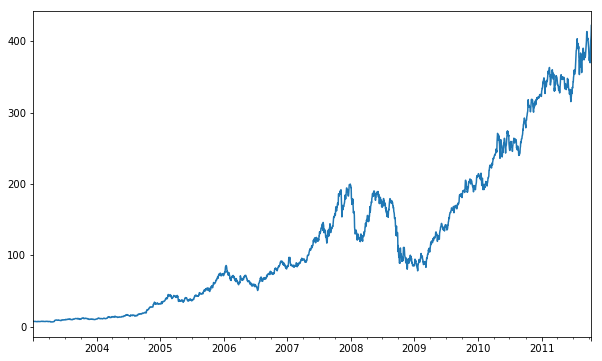

In [120]:
close_px.AAPL.plot(figsize=(10, 6))

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
  """Entry point for launching an IPython kernel.


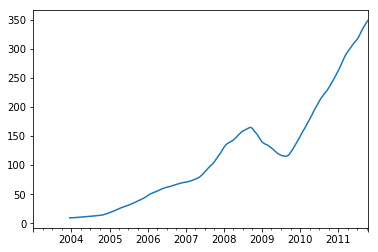

In [122]:
pd.rolling_mean(close_px.AAPL, 250).plot()

In [123]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250[5:12]

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=10,window=250,center=False).std()
  """Entry point for launching an IPython kernel.


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

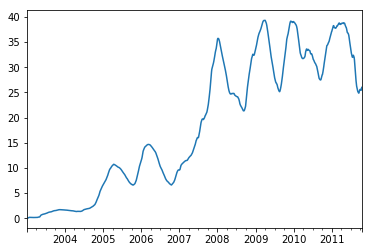

In [124]:
appl_std250.plot()

In [125]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  """Entry point for launching an IPython kernel.


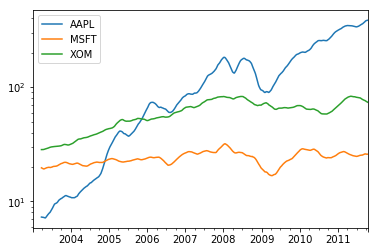

In [126]:
pd.rolling_mean(close_px, 60).plot(logy=True)

In [127]:
plt.close('all')

### 指数加权函数

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=50,window=60,center=False).mean()
  
D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
  import sys


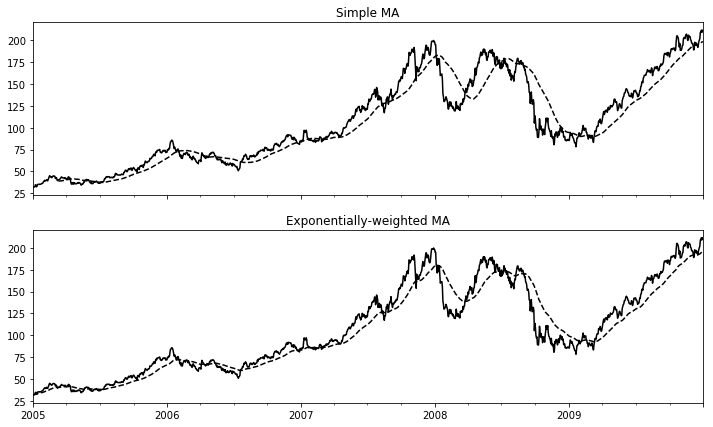

In [128]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])

aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])


axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### 二次移动窗口函数

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=125).corr(other=<Series>)
  """


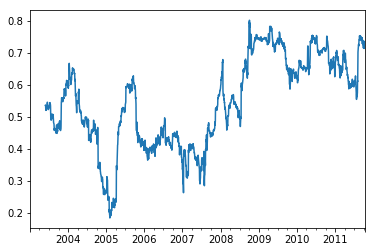

In [129]:
spx_px = close_px_all['SPX']

spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=125).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


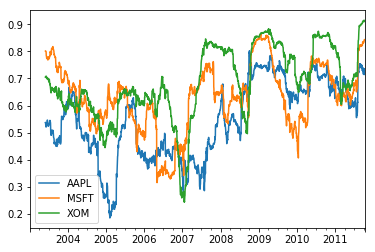

In [130]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

### 用户定义的滑动窗口函数

D:\Root\0-soft\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=250).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  This is separate from the ipykernel package so we can avoid doing imports until


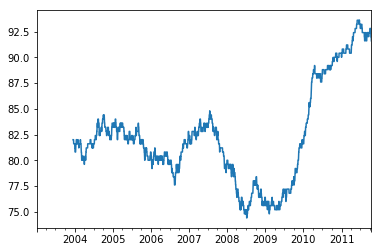

In [132]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

### 性能和内存使用方面的注意事项

In [ ]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')

In [ ]:
ts = Series(randn(len(rng)), index=rng)

In [ ]:
ts.resample('15min', how='ohlc')

In [ ]:
% timeit ts.resample('15min', how='ohlc')